In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
# Perform value counts
class_counts = df['Classes'].value_counts()

# Set the index name explicitly to 'Classes'
class_counts.index.name = 'Classes'

# Display the result
print(class_counts)

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


In [7]:
##enconding
df['Classes'] = df['Classes'].apply(lambda x: 0 if isinstance(x, str) and 'not fire' in x else 1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [11]:
##independent and dependent feature

X= df.drop('FWI', axis=1)
y=df['FWI']

In [12]:
X.head(
    
)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [14]:
##train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=42)

In [15]:
X_train.shape, X_test.shape

((181, 11), (61, 11))

In [16]:
## feature selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

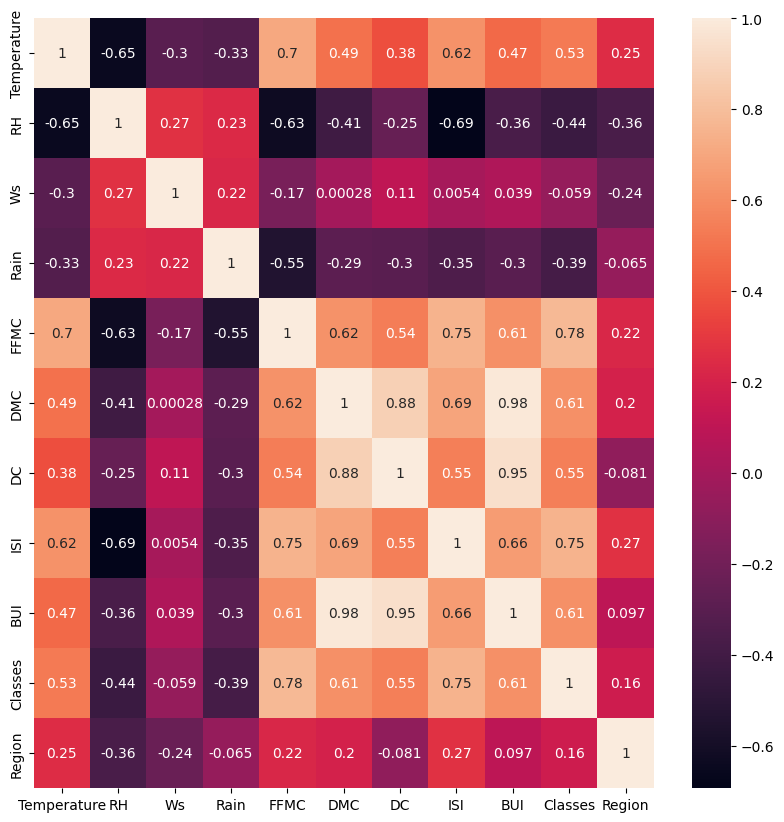

In [17]:
##check multicollinearity

plt.figure(figsize=(10,10))
corr = X_train.corr()
sns.heatmap(corr, annot= True)

In [18]:
##checking correlation


def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
##setting threshold

corr_features=correlation(X_train, 0.85)

In [20]:
## dropping the features with this correlation range
X_train.drop(corr_features, axis=1, inplace =True)
X_test.drop(corr_features, axis=1, inplace =True)

X_train.shape, X_test.shape


((181, 9), (61, 9))

In [21]:
##feature scaling or standardization

In [22]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

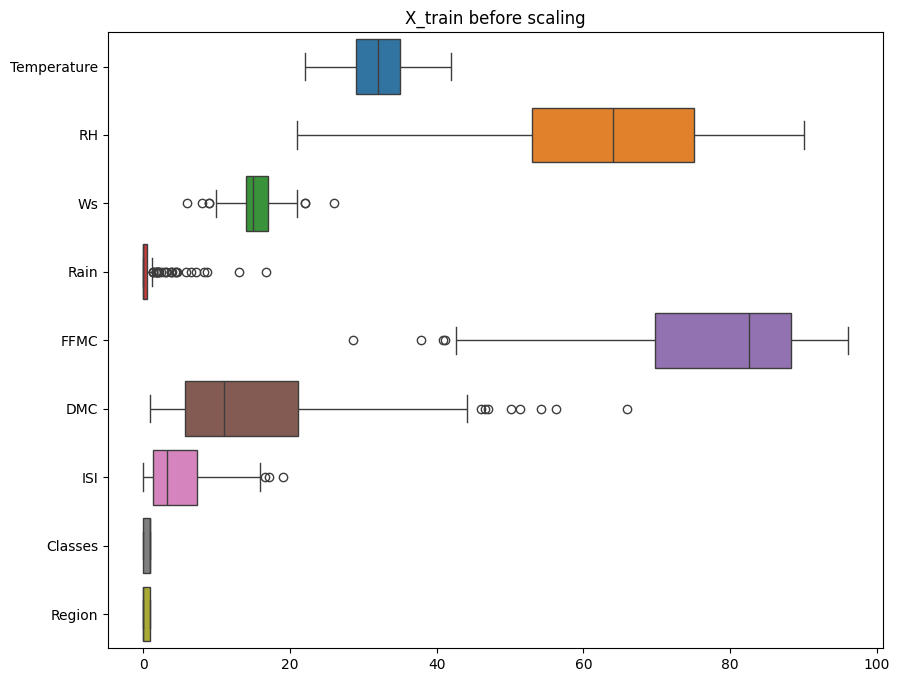

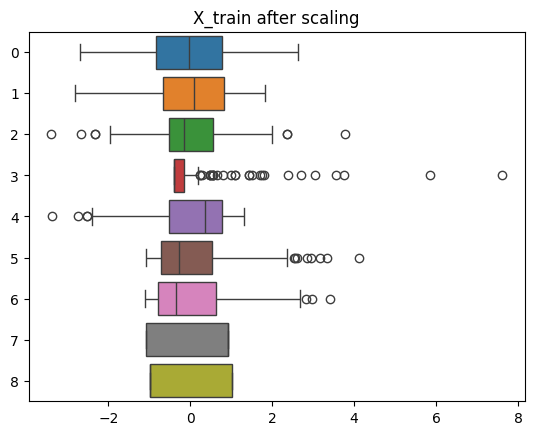

In [24]:
##box plot to know the effect of standard scalar

plt.subplots(figsize=(10,8))

sns.boxplot(data=X_train, orient='h')
plt.title('X_train before scaling')
plt.show()

sns.boxplot(data=X_train_scaled, orient='h')
plt.title('X_train after scaling')
plt.show()


Starting model


Linear regression model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


lr= LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print("mae", mae)
print("r2", score)

mae 0.5838063599546968
r2 0.983523052949508


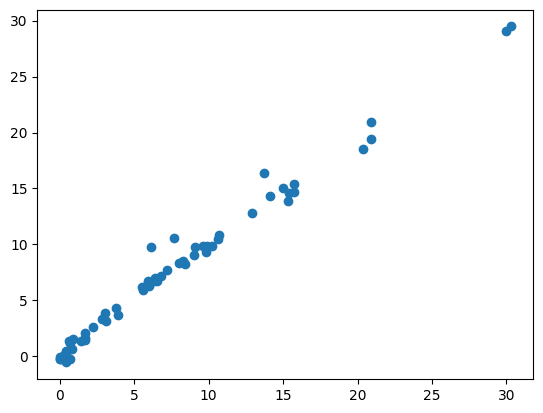

In [26]:
plt.scatter(y_test, y_pred)

mae 1.1459979969391694
r2 0.9497712193501187


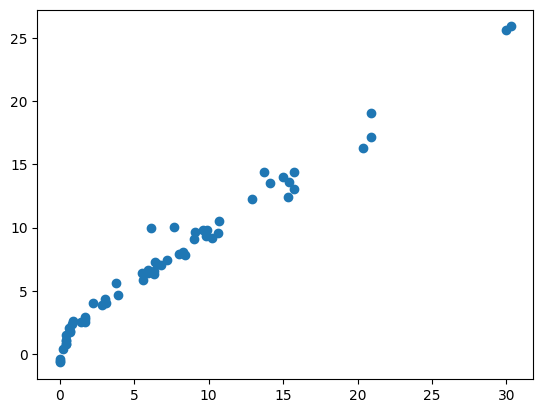

In [27]:
##lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred= lasso.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print("mae", mae)
print("r2", score)


plt.scatter(y_test, y_pred)

mae 0.6125515638101044
r2 0.9826983552292979


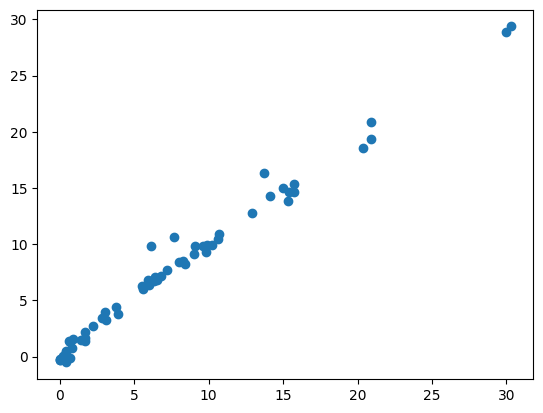

In [28]:
##Ridge regression

##lasso regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred= ridge.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print("mae", mae)
print("r2", score)


plt.scatter(y_test, y_pred)

mae 1.8915134363047037
r2 0.8731354681001339


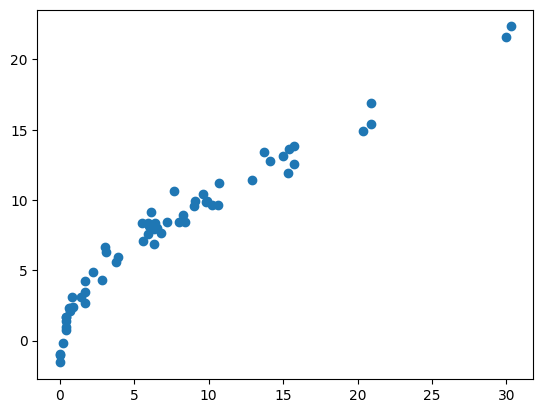

In [29]:
##ElasticNet

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


en = ElasticNet()
en.fit(X_train_scaled, y_train)
y_pred= en.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print("mae", mae)
print("r2", score)


plt.scatter(y_test, y_pred)


In [30]:
##Cross validation using lasscv

from sklearn.linear_model import LassoCV
lasscv = LassoCV(cv=5)
lasscv.fit(X_train_scaled, y_train)





LassoCV(cv=5)

In [31]:
lasscv.alphas_

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [32]:
lasscv.mse_path_

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

mae 0.6701641696301907
r2 0.9808648686248684


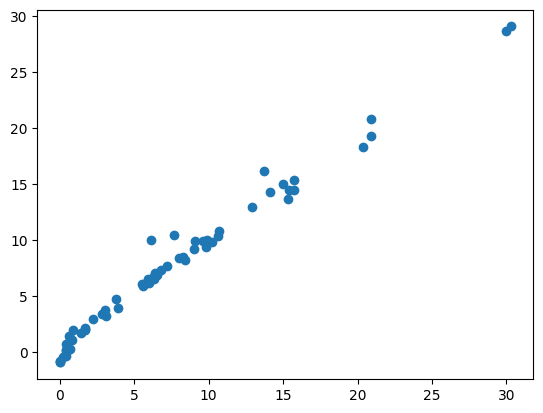

In [33]:
y_pred= lasscv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

mae= mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print("mae", mae)
print("r2", score)

In [34]:
import pickle


pickle.dump(scaler, open('scaler.pkl','wb'))

pickle.dump(ridge, open('ridge.pkl','wb'))